In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/laddu_dataset.csv')
data['Purity'] = data['Purity'].map({'Pure': 1, 'Impure': 0})

X = data.drop('Purity', axis=1)
y = data['Purity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5107 - loss: 10.4442 - val_accuracy: 0.4933 - val_loss: 3.4814
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5101 - loss: 3.0102 - val_accuracy: 0.4933 - val_loss: 0.9782
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4565 - loss: 1.7242 - val_accuracy: 0.5067 - val_loss: 1.2749
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4748 - loss: 1.1383 - val_accuracy: 0.5067 - val_loss: 0.9845
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4914 - loss: 0.9484 - val_accuracy: 0.5067 - val_loss: 1.0869
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4573 - loss: 0.9616 - val_accuracy: 0.5067 - val_loss: 0.7405
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5184 - loss: 0.7869 - val_accuracy: 0.5067 - val_loss: 0.7001
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4653 - loss: 0.7751 - val_accuracy: 0.4933 - val_los

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

3/3 - 0s - 8ms/step - accuracy: 0.5638 - loss: 0.6970
Test accuracy: 0.563829779624939


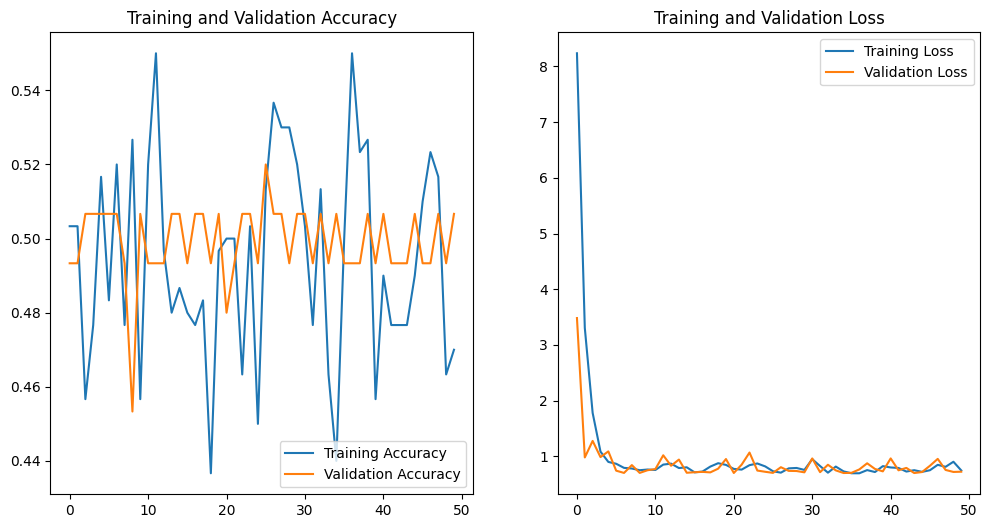

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(50)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


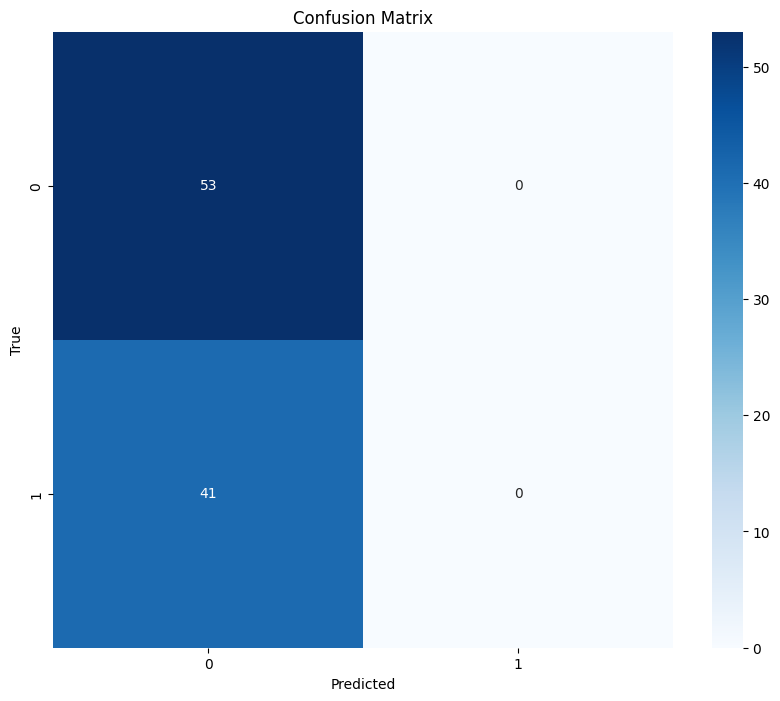

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


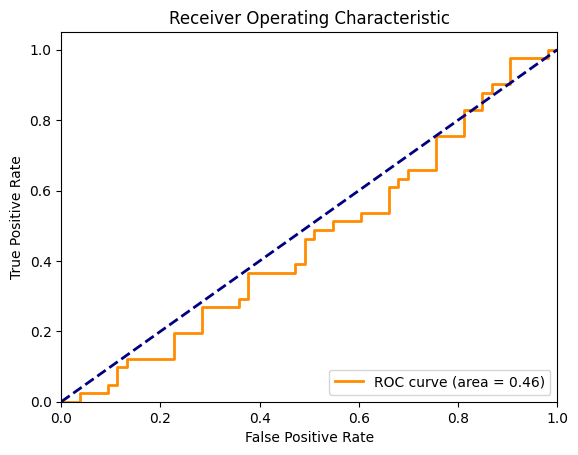

In [12]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

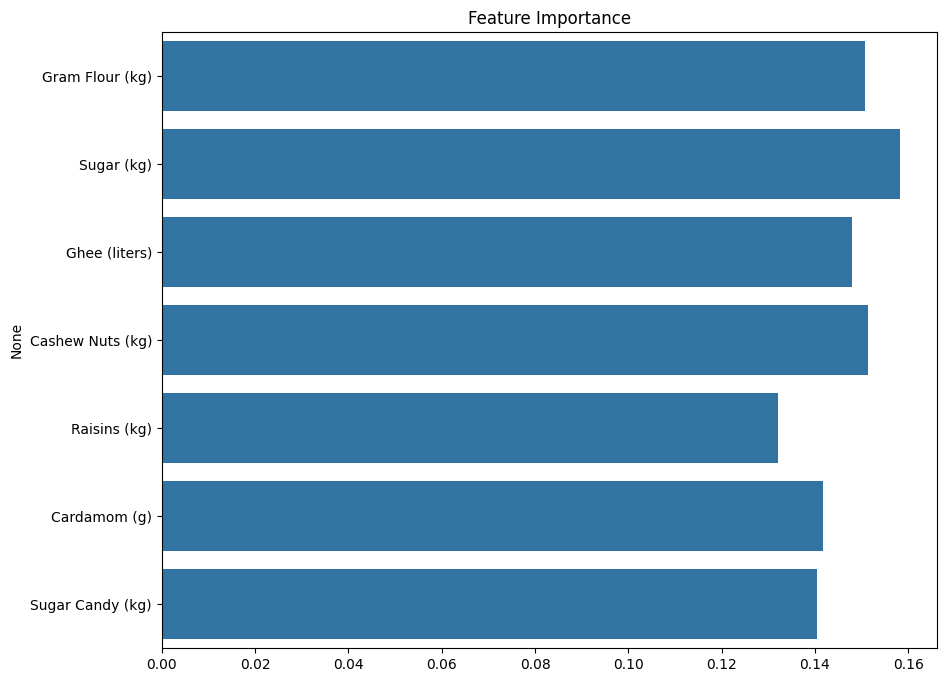

In [13]:
importances = model.layers[0].get_weights()[0]
feature_importance = np.mean(np.abs(importances), axis=1)
feature_names = X.columns

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


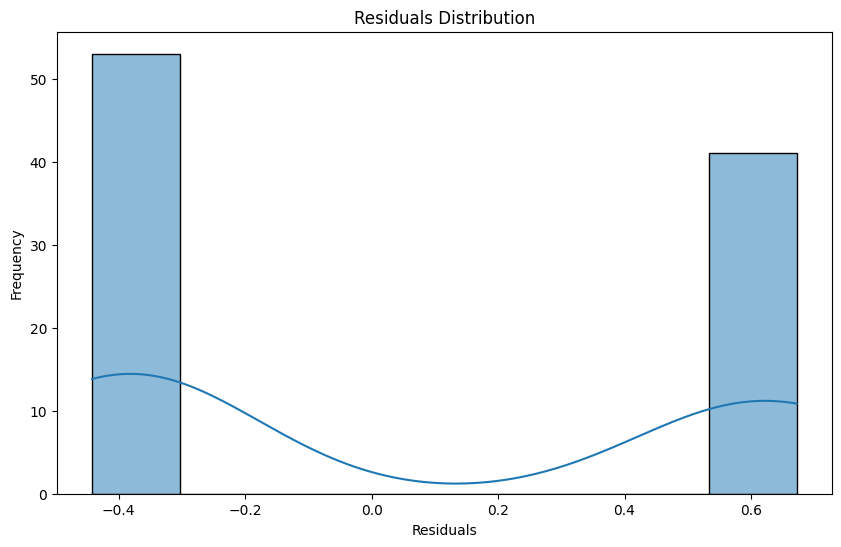

In [17]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
residuals = y_test - y_pred.flatten()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

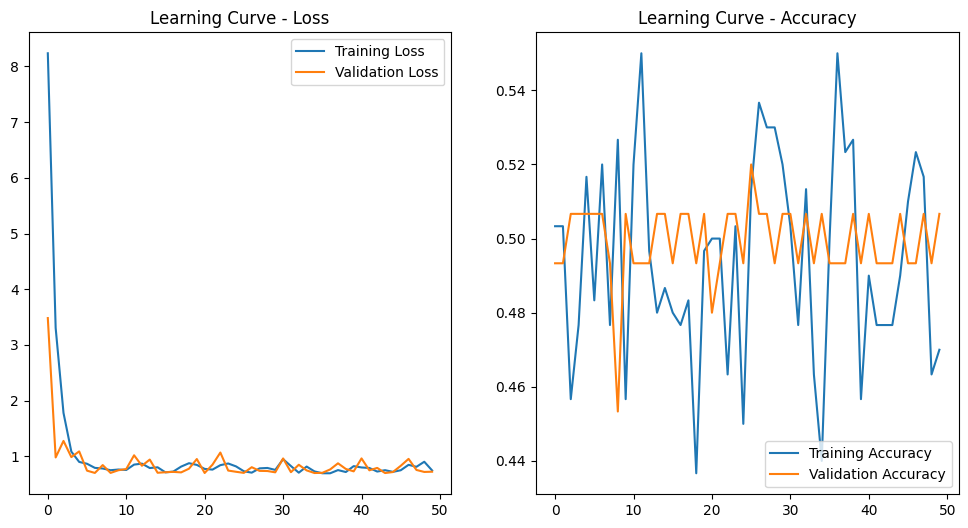

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Learning Curve - Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve - Accuracy')
plt.show()

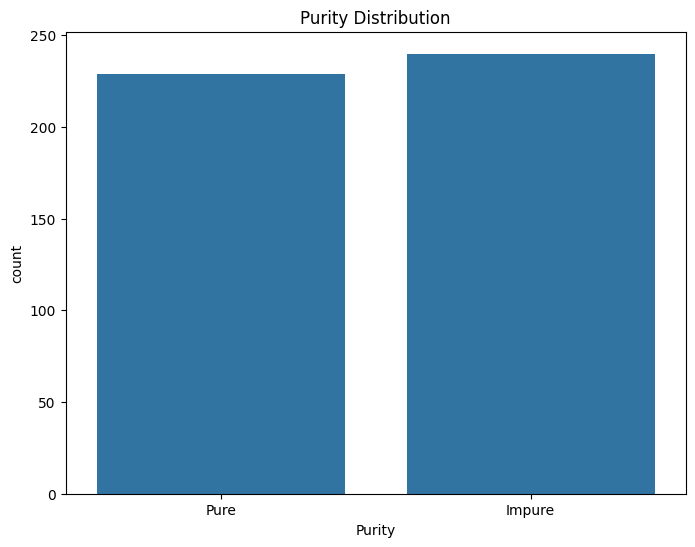

In [20]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Purity', data=laddu_dataset)
plt.title('Purity Distribution')
plt.show()

In [16]:
custom_input = np.array([[10, 10, 500, 0.7, 0.54, 150, 0.5]])
prediction = model.predict(custom_input)
print(f'Prediction for custom input: {"Pure" if prediction > 0.5 else "Impure"}')

# Visualize custom input prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for custom input: Impure
